In [ ]:
import numpy as np
import matplotlib.pyplot as plt


D= [[6.24840000e-03 2.50000000e+00 5.00000000e+00 2.28254244e+00]
 [2.50000000e+00 6.24840000e-03 2.50000000e+00 4.63249393e+00]
 [5.00000000e+00 2.50000000e+00 6.24840000e-03 7.08590150e+00]
 [2.28254244e+00 4.63249393e+00 7.08590150e+00 4.75000000e-03]]
Dprime= [[850.11984449 852.61984449 855.11984449 848.12055783]
 [847.61984449 850.11984449 852.61984449 845.62055994]
 [845.11984449 847.61984449 850.11984449 843.12056207]
 [852.12055449 854.62055241 857.12055034 850.11984449]]
Dist 850.1198444925279
Rprime= 0.05937600000000001


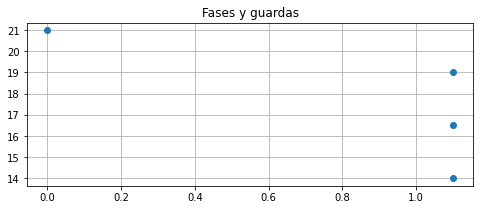

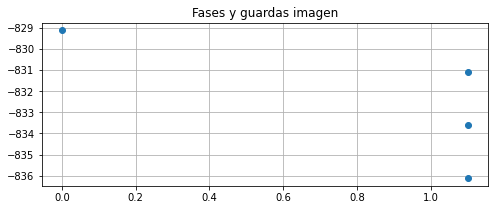

In [ ]:
Nf=3          #Numero de fases
Ng=1          #Numero de guardas
n=Nf+Ng
Z=np.zeros((n,n))     #definición de la matriz Z
D=np.zeros((n,n)) 
Dprime=np.zeros((n,n)) 

Z=Z.astype(complex)       
 
ro=100            #Resistividad del terreno
f=60              #Frecuencia de la red
 
Dist=658.5*np.sqrt(ro/f)      #Distancia imagen
Rprime=9.896*10**(-4)*f       #Resistencia mutua (debido a conductores imagen)
 

 

#Coordenadas de los conductores:
Fases=np.zeros((n*3,2))

Fases[0]=(1.1,19)            #posición conductor a
Fases[1]=(1.1,16.5)       #posición conductor b
Fases[2]=(1.1,14)        #posición conductor b
Fases[3]=(0,21)        #posición guarda 1 


for i in range(n,2*n):
  Fases[i,0]=Fases[i-n,0]
  Fases[i,1]=Fases[i-n,1]-Dist

RMGfase=0.0062484               #RMG FASE
RMGguarda=0.00475          #Radio cable de guarda *0.7788

Dpropia=(RMGfase,RMGfase,RMGfase,RMGguarda)

for i in range (0,n):
  for j in range(0,n): 
    if (j==i):
      D[i,j]=Dpropia[i]           #Distancias entre cables aéreos
    else:
      D[i,j]=np.sqrt((Fases[i,0]-Fases[j,0])**2+(Fases[i,1]-Fases[j,1])**2)



for i in range (0,n):
  for j in range(0,n): 
    if (j==i):            #Distancias entre cables aéreos y cables virtuales
      Dprime[i,j]=Dist
    else:
      Dprime[i,j]=np.sqrt((Fases[i,0]-Fases[j+n,0])**2+(Fases[i,1]-Fases[j+n,1])**2)


 
 
Rfase=0.2622      #Resistencia en ohms por kilómetro determinada previamente 
Rguarda=0.5142      #Resistencia en ohms por km para los cables de guarda
 
Rk=np.array((Rfase,Rfase,Rfase,Rguarda))  #Vector de resistencias de 3 fases y dos retornos
 



plt.figure(figsize=(8,3))
plt.plot(Fases[0:n,0],Fases[0:n,1],'o')
plt.title('Fases y guardas')
plt.grid()

plt.figure(figsize=(8,3))
plt.plot(Fases[n:2*n,0],Fases[n:2*n,1],'o')
plt.title('Fases y guardas imagen')
plt.grid()

print('D=',D)
print('Dprime=',Dprime)
print('Dist',Dist)
print('Rprime=',Rprime)


In [ ]:
for i in range(0,n):
  for j in range(0,n):
    if (j==i):
      Z[i,j]=complex(Rk[i]+Rprime,4*np.pi*f*10**(-4)*np.log(Dist/D[i,j])) #Llenado de diagonal      
    else:               
      Z[i,j]=complex(Rprime,4*np.pi*f*10**(-4)*np.log(Dist/D[i,j]))  #Llenado de no diagonal
Z

array([[0.321576+0.89126786j, 0.059376+0.43950278j, 0.059376+0.38724071j,
        0.059376+0.44636407j],
       [0.059376+0.43950278j, 0.321576+0.89126786j, 0.059376+0.43950278j,
        0.059376+0.3929968j ],
       [0.059376+0.38724071j, 0.059376+0.43950278j, 0.321576+0.89126786j,
        0.059376+0.36095167j],
       [0.059376+0.44636407j, 0.059376+0.3929968j , 0.059376+0.36095167j,
        0.573576+0.91194061j]])

In [ ]:
ZA=Z[0:Nf,0:Nf]
ZB=Z[0:Nf,Nf:n]         #Agrupamiento de matricez A,B,C y D
ZC=Z[Nf:n,0:Nf]
ZD=Z[Nf:n,Nf:n]


print('ZA=')
print(ZA)
print('ZB=')
print(ZB)
print('ZC=')
print(ZC)
print('ZD=')
print(ZD)

ZA=
[[0.321576+0.89126786j 0.059376+0.43950278j 0.059376+0.38724071j]
 [0.059376+0.43950278j 0.321576+0.89126786j 0.059376+0.43950278j]
 [0.059376+0.38724071j 0.059376+0.43950278j 0.321576+0.89126786j]]
ZB=
[[0.059376+0.44636407j]
 [0.059376+0.3929968j ]
 [0.059376+0.36095167j]]
ZC=
[[0.059376+0.44636407j 0.059376+0.3929968j  0.059376+0.36095167j]]
ZD=
[[0.573576+0.91194061j]]


In [ ]:
Zp=ZA-ZB@np.linalg.inv(ZD)@ZC     #Obtención de Matriz Zp (ecuación 4.7.19)
print('Zp parte real')
print(Zp.real)
print('Zp parte imaginaria')
print(Zp.imag)

Zp parte real
[[0.37664869 0.10516612 0.09959226]
 [0.10516612 0.35949104 0.09256235]
 [0.09959226 0.09256235 0.35054113]]
Zp parte imaginaria
[[0.71129232 0.27981032 0.23972752]
 [0.27981032 0.74962068 0.30869113]
 [0.23972752 0.30869113 0.77048489]]


In [ ]:
Zphat=Zp       #Matriz equivalente con transposición (Z gorro)
     

meandiag=1/3*(Zp[0,0]+Zp[1,1]+Zp[2,2])   #promedio de la diagonal
mean=1/3*(Zp[1,0]+Zp[2,0]+Zp[2,1])      #promedio del triángulo inferior 

for i in range(0,3):
  for j in range(0,3):
    if (j==i):
      Zphat[i,j]=meandiag
    else:
      Zphat[i,j]=mean

Zphat

array([[0.36222696+0.7437993j , 0.09910691+0.27607633j,
        0.09910691+0.27607633j],
       [0.09910691+0.27607633j, 0.36222696+0.7437993j ,
        0.09910691+0.27607633j],
       [0.09910691+0.27607633j, 0.09910691+0.27607633j,
        0.36222696+0.7437993j ]])

H [[38.         35.5        33.         40.01512214]
 [35.5        33.         30.5        37.51612986]
 [33.         30.5        28.         35.01728145]
 [40.01512214 37.51612986 35.01728145 42.        ]]
 
P [[1.56691476e+08 4.77148671e+07 3.39363235e+07 5.15044730e+07]
 [4.77148671e+07 1.54154374e+08 4.49848471e+07 3.76158770e+07]
 [3.39363235e+07 4.49848471e+07 1.51199612e+08 2.87330348e+07]
 [5.15044730e+07 3.76158770e+07 2.87330348e+07 1.63422099e+08]]
 
D [[6.24840000e-03 2.50000000e+00 5.00000000e+00 2.28254244e+00]
 [2.50000000e+00 6.24840000e-03 2.50000000e+00 4.63249393e+00]
 [5.00000000e+00 2.50000000e+00 6.24840000e-03 7.08590150e+00]
 [2.28254244e+00 4.63249393e+00 7.08590150e+00 4.75000000e-03]]


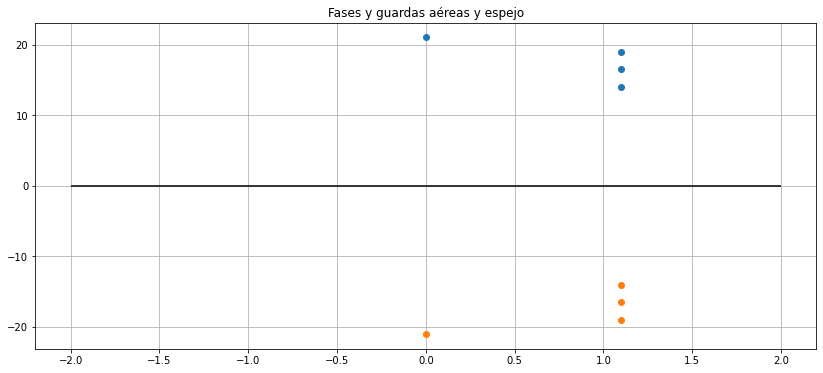

In [ ]:
epsilon=8.85*10**(-12)
P=np.zeros((n,n))               #Matriz P
H=np.zeros((n,n))               #Matriz de distancias H


for i in range(2*n,3*n):
  Fases[i,1]=-Fases[i-2*n,1]
  Fases[i,0]=Fases[i-2*n,0]


for i in range(0,n):
  for j in range(0,n):
    H[i,j]=np.sqrt((Fases[i,0]-Fases[j+2*n,0])**2+(Fases[i,1]-Fases[j+2*n,1])**2)

 

for i in range(0,n):
  for j in range(0,n):
    P[i,j]=1/(2*np.pi*epsilon)*np.log(H[i,j]/D[i,j])/1000
    

plt.figure(figsize=(14,6))
plt.plot(Fases[0:n,0],Fases[0:n,1],'o')
plt.title('Fases y guardas aéreas y espejo')
plt.grid()
plt.plot(Fases[2*n:3*n,0],Fases[2*n:3*n,1],'o')
plt.hlines(0,-2,2)

print('H',H)
print(' ')
print('P',P)
print(' ')
print('D',D)

In [ ]:
PA=P[0:Nf,0:Nf]
PB=P[0:Nf,Nf:n]         #Agrupamiento de matrices A,B,C y D
PC=P[Nf:n,0:Nf]
PD=P[Nf:n,Nf:n]


print('PA=')
print(PA)
print('PB=')
print(PB)
print('PC=')
print(PC)
print('PD=')
print(PD)

PA=
[[1.56691476e+08 4.77148671e+07 3.39363235e+07]
 [4.77148671e+07 1.54154374e+08 4.49848471e+07]
 [3.39363235e+07 4.49848471e+07 1.51199612e+08]]
PB=
[[51504472.97225708]
 [37615876.98771803]
 [28733034.77844017]]
PC=
[[51504472.97225708 37615876.98771803 28733034.77844017]]
PD=
[[1.63422099e+08]]


In [ ]:
Cp=np.linalg.inv(PA-PB@np.linalg.inv(PD)@PC)
Cp

array([[ 7.69987649e-09, -1.66750675e-09, -8.73051721e-10],
       [-1.66750675e-09,  7.74546006e-09, -1.74969288e-09],
       [-8.73051721e-10, -1.74969288e-09,  7.45040578e-09]])

In [ ]:

Cphat=np.zeros((3,3))       #MatriP equivalente con transposición 
     

meandiagC=1/3*(Cp[0,0]+Cp[1,1]+Cp[2,2])   #promedio de la diagonal
meanC=1/3*(Cp[1,0]+Cp[2,0]+Cp[2,1])      #promedio del triángulo inferior 

for i in range(0,3):
  for j in range(0,3):
    if (j==i):
      Cphat[i,j]=meandiagC
    else:
      Cphat[i,j]=meanC

Cphat

array([[ 7.63191411e-09, -1.43008378e-09, -1.43008378e-09],
       [-1.43008378e-09,  7.63191411e-09, -1.43008378e-09],
       [-1.43008378e-09, -1.43008378e-09,  7.63191411e-09]])

In [ ]:
Yp=2*np.pi*f*Cp*complex(0,1)


Yphat=2*np.pi*f*Cphat*complex(0,1)

print('Yp')
print(Yp)
print('Ypgorro')
print(Yphat)


Yp
[[ 0.+2.90278505e-06j -0.-6.28635233e-07j -0.-3.29132745e-07j]
 [-0.-6.28635233e-07j  0.+2.91996965e-06j -0.-6.59618676e-07j]
 [-0.-3.29132745e-07j -0.-6.59618676e-07j  0.+2.80873681e-06j]]
Ypgorro
[[ 0.+2.87716384e-06j -0.-5.39128885e-07j -0.-5.39128885e-07j]
 [-0.-5.39128885e-07j  0.+2.87716384e-06j -0.-5.39128885e-07j]
 [-0.-5.39128885e-07j -0.-5.39128885e-07j  0.+2.87716384e-06j]]


In [ ]:
#Comparación con atp 

Z_p_atp=np.array([[complex(3.384574E-01,5.018261E-01),complex(1.508894E-01,2.362036E-01),complex(1.508894E-01,2.362036E-01)],
                  [complex(1.508894E-01 ,2.362036E-01),complex(3.085068E-01,5.299845E-01),complex(1.363323E-01,2.043248E-01)],
                  [complex(1.508894E-01,2.362036E-01),complex(1.363323E-01,2.043248E-01),complex(3.085068E-01,5.299845E-01)]])
errorz=(Z_p_atp- Zp)/Z_p_atp*100
print('Porcentajes de error, matriz Z, parte real: ')
print(np.abs(errorz.real))
print('Porcentajes de error, matriz Z, parte imaginaria: ')
print(np.abs(errorz.imag))

print(' ')

Y_p_atp=np.array([[2.807826E-06,-2.974273E-07,-2.974273E-07], 
                  [-2.974273E-07,2.662977E-06,-1.362939E-07],
                  [-2.974273E-07,-1.362939E-07,2.662977E-06]])

errory=(Y_p_atp- Yp.imag)/Y_p_atp*100
print('Porcentajes de error, matriz de capacitancias: ')
print(np.abs(errory.real))

Porcentajes de error, matriz Z, parte real: 
[[35.33829451  2.04258808  2.04258808]
 [ 2.04258808 34.54011532 15.88725236]
 [ 2.04258808 15.88725236 34.54011532]]
Porcentajes de error, matriz Z, parte imaginaria: 
[[19.0973561  23.22764789 23.22764789]
 [23.22764789  9.96981025 28.8192369 ]
 [23.22764789 28.8192369   9.96981025]]
 
Porcentajes de error, matriz de capacitancias: 
[[  3.38194214 111.35761025  10.65989725]
 [111.35761025   9.65057713 383.96786359]
 [ 10.65989725 383.96786359   5.47356612]]


In [ ]:
a=complex(-0.5,np.sqrt(3)/2)
T=np.array([[1,1,1],[1,a**2,a],[1,a,a**2]])
Z_sec=np.linalg.inv(T)@Zp@T
print('Parte real: \n',Z_sec.real)
print('Parte imaginaria: \n',Z_sec.imag)

Parte real: 
 [[ 5.60440772e-01 -1.46015861e-17 -6.29130230e-18]
 [ 2.77555756e-17  2.63120047e-01  2.77555756e-17]
 [-5.55111512e-17  2.77555756e-17  2.63120047e-01]]
Parte imaginaria: 
 [[ 1.29595195e+00  1.00010046e-16  1.14483265e-16]
 [-2.77555756e-17  4.67722975e-01 -2.77555756e-17]
 [-2.77555756e-17 -5.55111512e-17  4.67722975e-01]]


In [ ]:
a=complex(-0.5,np.sqrt(3)/2)
T=np.array([[1,1,1],[1,a**2,a],[1,a,a**2]])
Y_sec=np.linalg.inv(T)@Yp@T
print('Parte real: \n',Y_sec.real)
print('Parte imaginaria: \n',Y_sec.imag)

Parte real: 
 [[ 0.00000000e+00 -5.43487655e-08  5.43487655e-08]
 [ 5.43487655e-08 -2.24993127e-22  2.05027998e-07]
 [-5.43487655e-08 -2.05027998e-07  1.05879118e-22]]
Parte imaginaria: 
 [[ 1.79890607e-06  7.30555032e-08  7.30555032e-08]
 [ 7.30555032e-08  3.41629272e-06 -1.07679184e-07]
 [ 7.30555032e-08 -1.07679184e-07  3.41629272e-06]]
